In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NOxy1','NOxy2','NOxy3','year', 'month', 'day']]
Y1 = df['NOx']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=2)

In [35]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=7,
                                      max_features=0.1,
                                      min_samples_split=2,
                                      min_samples_leaf=3,
                                      learning_rate=0.02)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.02, max_depth=7, max_features=0.1,
                          min_samples_leaf=3, n_estimators=2000)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999999676628176

Score on test data: 0.7505450955591082

Root Mean Squared Error: 40.660437277749566

Overall model accuracy: 0.7505450955591082


In [37]:
test=data.loc['207':'259']
X=test[['NOxy1','NOxy2','NOxy3','year', 'month', 'day']]
X

,NOxy1,NOxy2,NOxy3,year,month,day
207,144.901429,180.832857,212.015714,2019,12,29
208,117.267143,397.518571,194.864286,2020,1,5
209,100.144286,219.385714,190.755714,2020,1,12
210,126.631429,148.370000,195.770000,2020,1,19
211,52.171429,157.414286,127.910000,2020,1,26
212,65.417143,77.248571,156.391429,2020,2,2
213,80.275714,129.428571,268.622857,2020,2,9
214,98.288571,86.665714,129.678571,2020,2,16
215,96.087143,173.738571,120.168571,2020,2,23
216,117.698571,137.625714,108.778571,2020,3,1


In [38]:
predict=grad_boost.predict(X)

In [39]:
predict

array([ 42.528478  , 142.97702524, 113.53167821, 104.95588262,
       115.37554211,  73.27053418,  80.68669238,  95.26515142,
       103.77010598, 116.33984574,  85.56028219,  82.1963692 ,
        81.33922595,  83.49251124,  88.99686601,  65.42780203,
        67.55214056,  88.8481551 ,  63.47202591,  72.05575643,
        64.17004089,  93.60325776,  69.16053361,  65.95974142,
        46.88285938,  51.84159152,  54.42872605,  28.77377636,
        36.83426686,  33.04511271,  38.88375925,  32.62703706,
        29.57256407,  31.33807921,  31.4147008 ,  40.19651459,
        26.44177072,  29.04350312,  32.92746004,  63.44426817,
        88.80576384, 102.34950242, 103.49776202, 111.18162377,
       101.41547005,  87.61007795, 104.91168268,  79.09981602,
        77.96449593,  76.42431323,  78.62651337, 102.56622773,
        80.01486571])

In [40]:
dates=data.loc['207':'259','From Date']

In [41]:
X['From Date']=dates.values

In [42]:
X.columns

Index(['NOxy1', 'NOxy2', 'NOxy3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [43]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [44]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [45]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [46]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

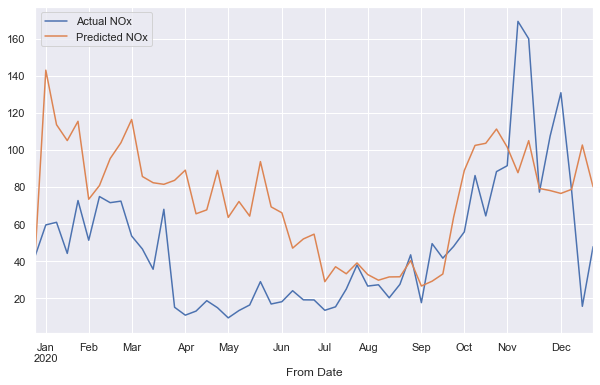

In [47]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')

In [48]:
np.sqrt(mean_squared_error(test['NOx'],X['pred']))

42.34489617028514

In [49]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 32.312535743825066
MSE: 1653.2711596178065
RMSE: 40.660437277749566
R-Squared: 0.7505450955591082


In [50]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 34.284152495581445
MSE: 1793.0902316722293
RMSE: 42.34489617028514
R-Squared: -0.3757320428165072


In [51]:
import pickle
filename = 'NOx_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [52]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7505450955591082


# 3rd plot

In [53]:
testcase = pd.DataFrame()

In [54]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [55]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [56]:
testcase

,test,pred,Corrected
154,184.412857,126.100769,166.761206
192,22.385714,23.533208,-17.127229
135,18.158571,57.349427,16.688990
10,333.305714,226.586903,267.247340
13,195.612857,150.849968,191.510405
173,79.605714,74.276679,114.937116
205,73.787143,62.221047,102.881484
23,59.937143,77.326744,36.666306
71,55.952857,98.988496,58.328059
28,73.998571,78.811460,38.151023


In [57]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [58]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9012915205652519

In [59]:
test2020=pd.DataFrame()

In [60]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [61]:
test2020.index=test.index

In [62]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

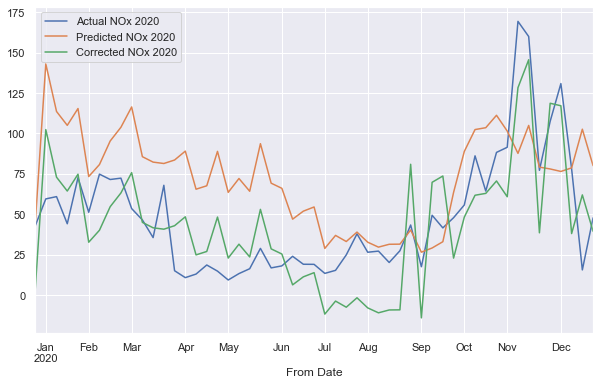

In [63]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [64]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.525279155885437